In [1]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (24,5)
import seaborn as sns
sns.set()
sns.set(font_scale=1.75)
import scipy

In [2]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000, 2000000, 3000000]
data = pd.read_csv("results.csv", header=None)
data.columns = cols[:len(data.columns)]
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
    data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)


<ipython-input-2-4c94fa8f25e3>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-2-4c94fa8f25e3>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-2-4c94fa8f25e3>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test",

In [3]:
data.describe()

,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000,2000000
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,159.861111,215.655556,260.788889,287.644444,332.394444,188.011111,404.444444,193.500000,199.633333,584.716667,205.472222,205.416667,788.888889,209.961111,231.683333
std,153.846538,251.636550,384.386401,462.756468,602.398961,115.062916,838.429006,120.323145,121.822836,1496.681201,125.985076,126.214010,2250.694768,127.928418,144.253016
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,55.000000,77.750000,87.000000,92.000000,95.000000,99.000000,103.750000,102.000000,105.750000,110.750000,113.750000,109.000000,109.750000,112.500000,115.500000
50%,135.500000,161.500000,170.500000,177.500000,184.500000,185.500000,190.000000,182.500000,193.500000,196.000000,192.000000,197.000000,198.500000,204.000000,229.000000
75%,206.000000,227.000000,241.250000,268.000000,271.500000,268.250000,287.000000,276.250000,288.500000,297.000000,297.000000,298.250000,309.000000,297.000000,318.000000
max,909.000000,1296.000000,2398.000000,2341.000000,2993.000000,514.000000,4039.000000,480.000000,446.000000,7147.000000,460.000000,460.000000,10646.000000,475.000000,628.000000


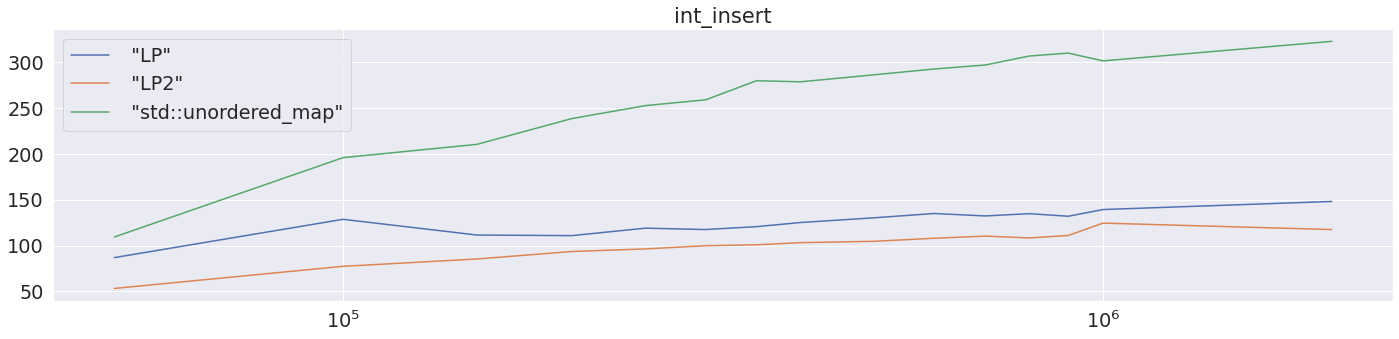

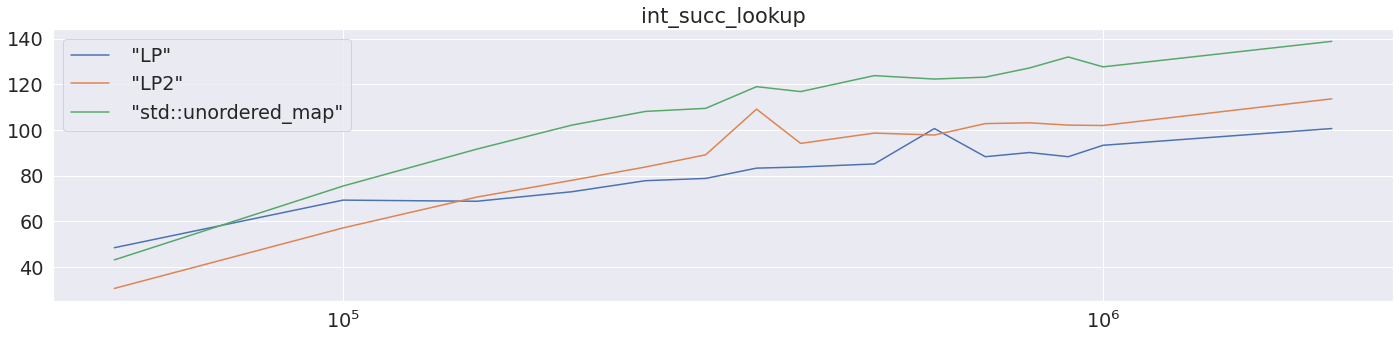

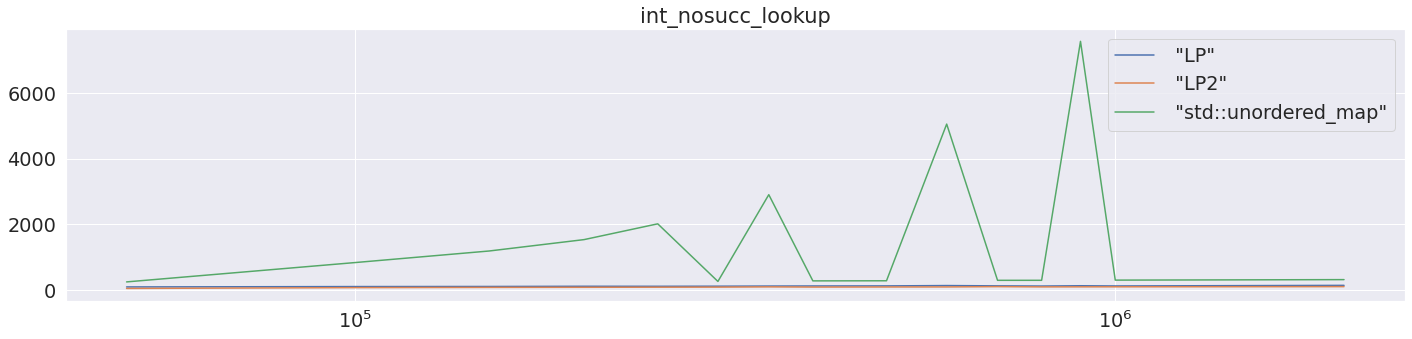

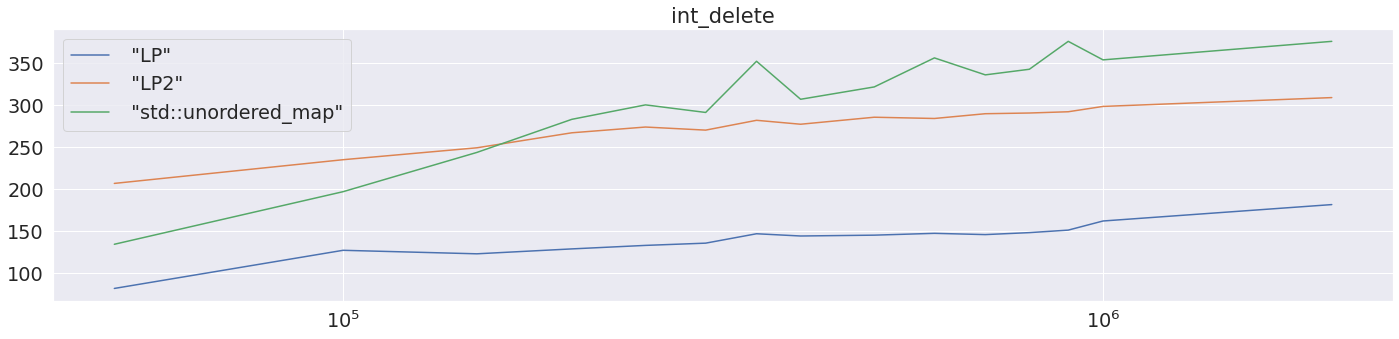

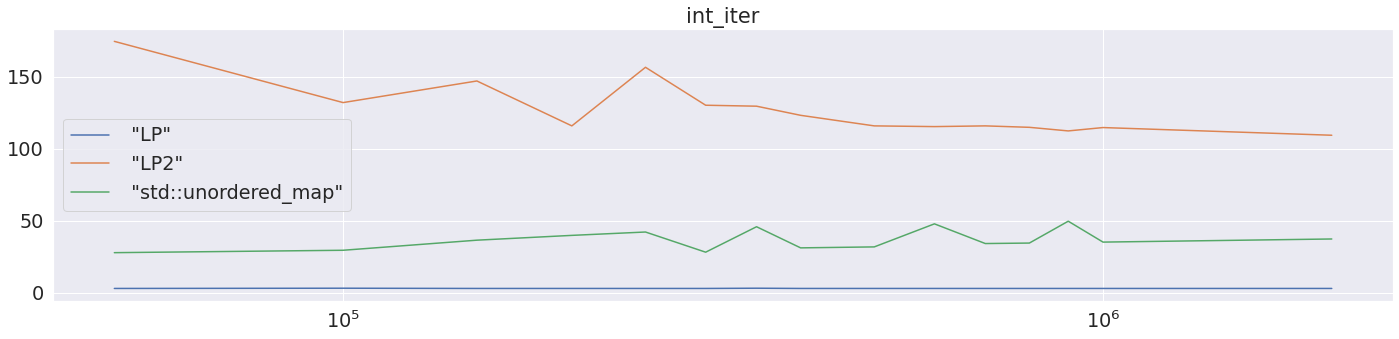

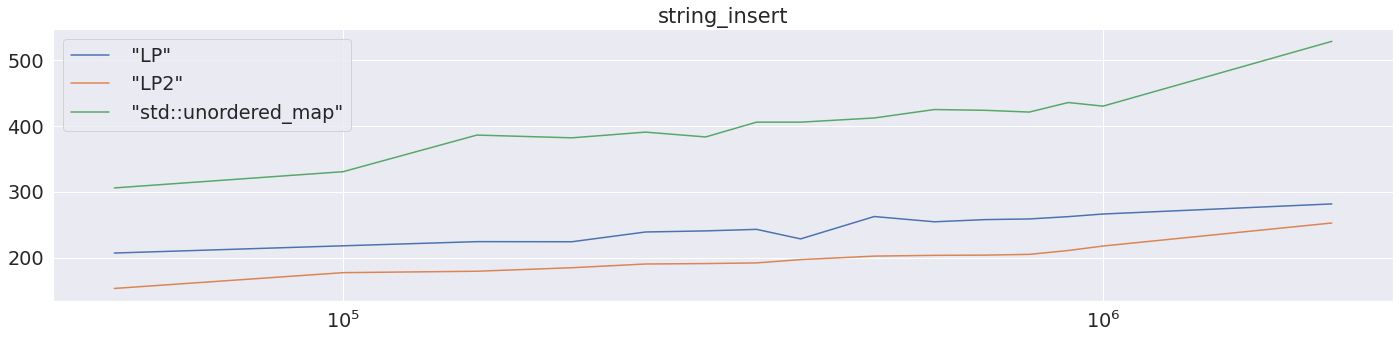

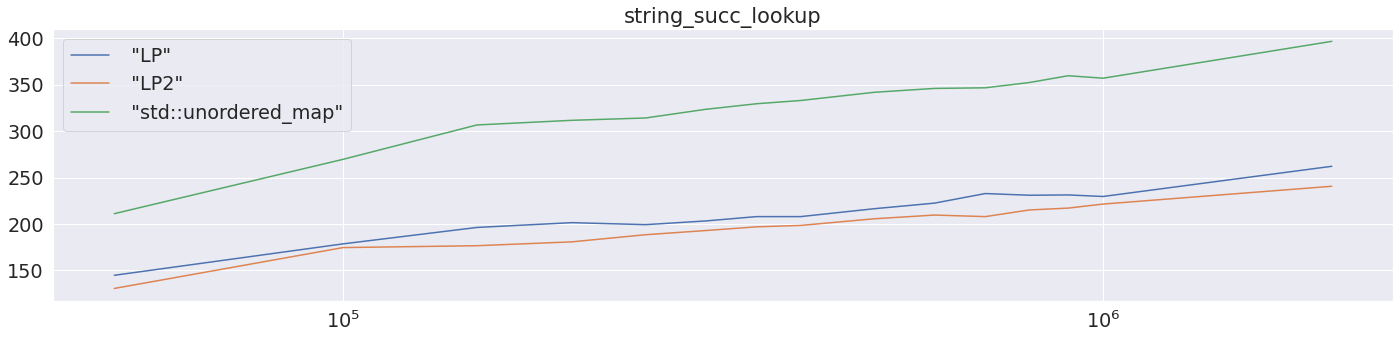

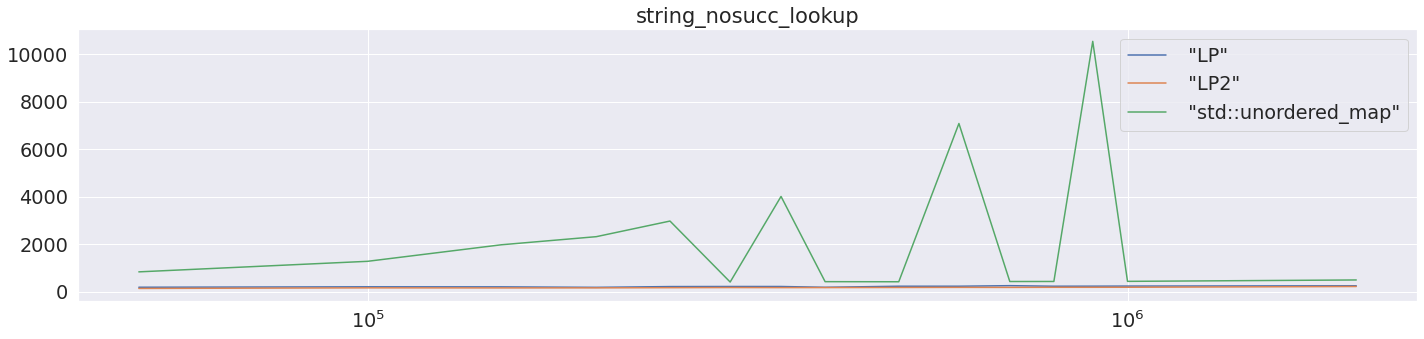

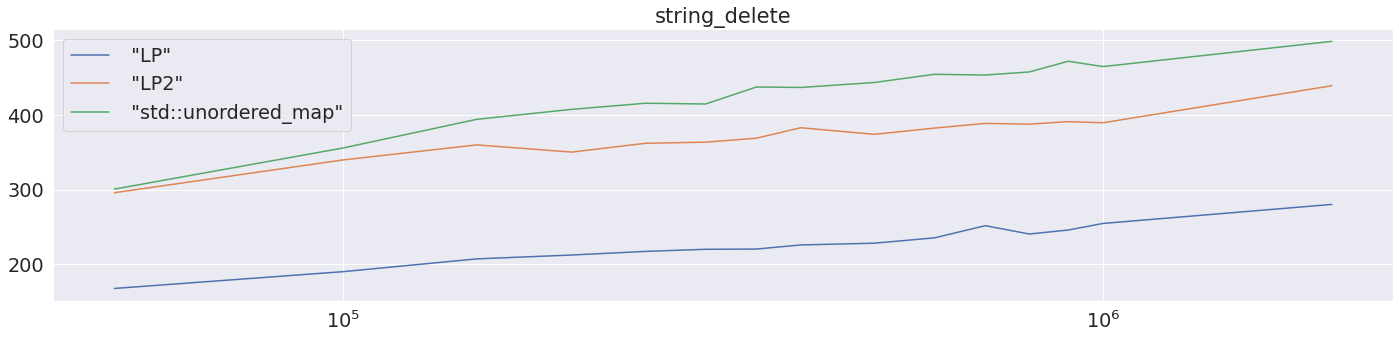

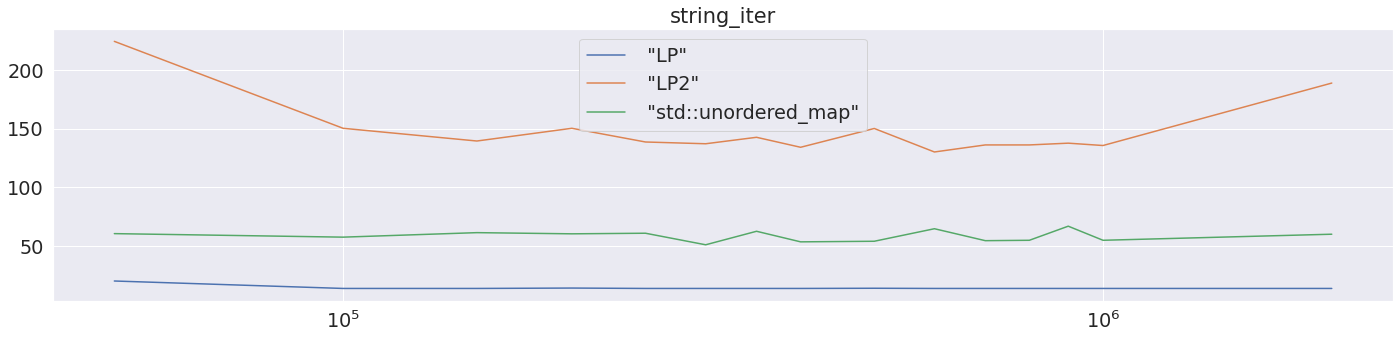

In [5]:
def gen_graph(test):
    badtest= ["int_insert", "string_insert"]
    for m in maps:
#         if "std::unordered_map" in m:
#             continue
        mdata = data_dict[(test,m)].mean()
        sns.lineplot(x=mdata.index, y=mdata, label=m)
    plt.title(test)
    plt.xscale("log")
    plt.show()
    
# print(maps)
for i in tests:
    gen_graph(i)

# This is the same as above, but i compiled with gcc instead to see if the speeds differed if i used a different compiler
